<a href="https://colab.research.google.com/github/anggitfathur/Skripsi/blob/main/Trafo4_STL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import gdown
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()
sns.set_style("darkgrid")


In [ ]:
# Define the Google Drive file ID and the destination file path
file_id = '1hcMzP8gtKVsJRuDRyBYI-7moZv5gEBFU'
output_path = 'Input_NN_trafo4.xlsx'

# Download the file from Google Drive
gdown.download(f'https://drive.google.com/uc?id={file_id}', output_path, quiet=False)

# Read data from the Excel file using openpyxl as the engine
data = pd.read_excel(output_path, usecols="C", nrows=128, header=None, names=["Beban Puncak"], engine="openpyxl")

# Convert the data and date_range to lists
data_list = data["Beban Puncak"].tolist()

# Use the describe() function to get summary statistics for the data
summary_stats = data.describe()

# Print the summary statistics
print(summary_stats)

Downloading...
From: https://drive.google.com/uc?id=1hcMzP8gtKVsJRuDRyBYI-7moZv5gEBFU
To: /content/Input_NN_trafo4.xlsx
100%|██████████| 20.2k/20.2k [00:00<00:00, 3.77MB/s]


       Beban Puncak
count    128.000000
mean     522.875000
std      125.473968
min      340.000000
25%      433.750000
50%      491.500000
75%      588.750000
max     1198.000000


In [ ]:
plt.rc("figure", figsize=(16, 12))
plt.rc("font", size=13)

In [ ]:
# Create a Pandas Series with a date index
data_list = pd.Series(
    data_list, index=pd.date_range("1-5-2012", periods=len(data), freq="M"), name="Beban Puncak"
)

# Use the describe() function to get summary statistics
summary_stats = data.describe()

# Print the summary statistics
print(summary_stats)

       Beban Puncak
count    128.000000
mean     522.875000
std      125.473968
min      340.000000
25%      433.750000
50%      491.500000
75%      588.750000
max     1198.000000


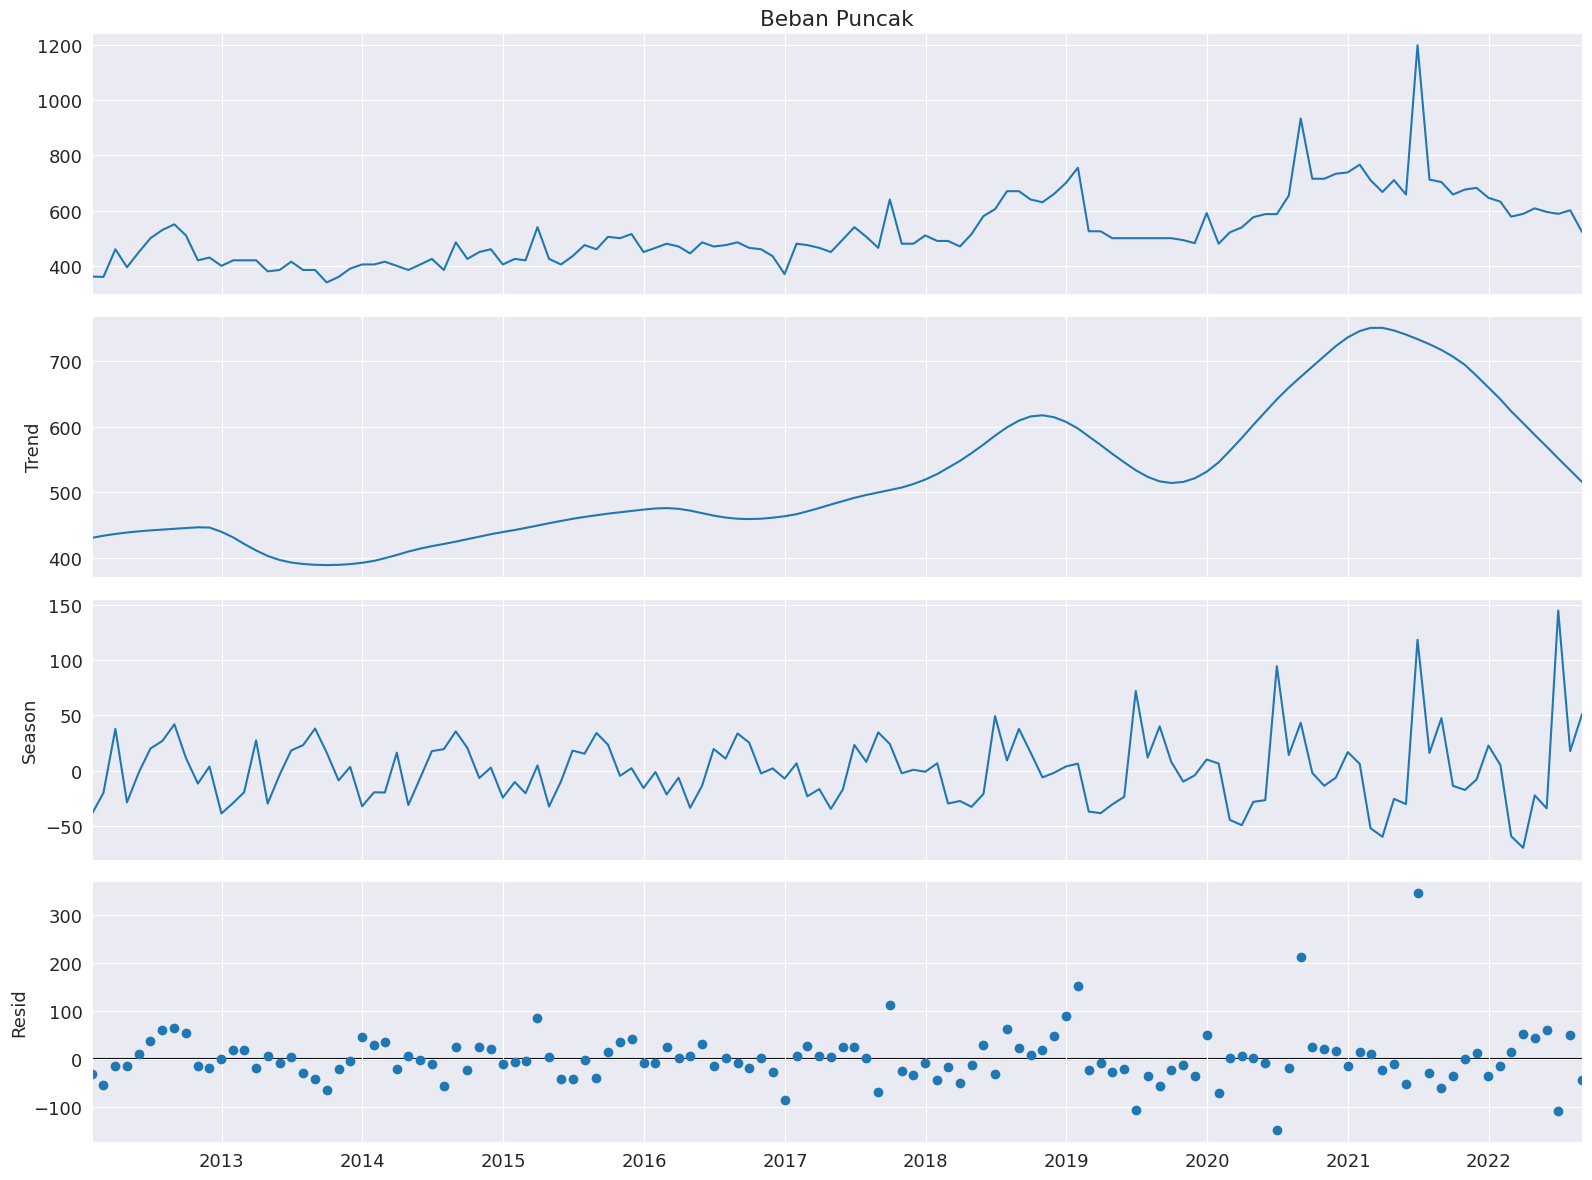

In [ ]:
from statsmodels.tsa.seasonal import STL

stl = STL(data_list, seasonal=13)
res = stl.fit()
fig = res.plot()


In [ ]:
trend = res.trend;
seasonal = res.seasonal;
residual = res.resid;

trend = list(trend);
seasonal = list(seasonal);
residual = list(residual);

In [ ]:
trend

[430.7313838713183,
 433.9221482002194,
 436.613977594484,
 438.82542802767404,
 440.6115583511463,
 442.06235567917156,
 443.29395814011633,
 444.4351432025489,
 445.6034183631697,
 446.74372385062935,
 446.402972222944,
 439.89940149648436,
 431.22736655876827,
 421.30182029714456,
 411.4479504764672,
 403.03064259565775,
 396.87161973522296,
 393.0099753745985,
 390.76968169225063,
 389.51417732516427,
 389.0816442818476,
 389.4635701009419,
 390.5808754046773,
 392.5782733999847,
 395.52623089402806,
 399.5939797373789,
 404.5574921436343,
 409.7142790450126,
 414.27355103757657,
 417.9619671426436,
 421.33238014838474,
 424.88232064628863,
 428.6603068288891,
 432.4943945555293,
 436.1972297020539,
 439.5380262909946,
 442.58761722121545,
 445.79097684646496,
 449.3546907783241,
 453.03331126403106,
 456.4895355842699,
 459.7286257343864,
 462.60568447273914,
 465.2089594855746,
 467.58169312668906,
 469.6970799428676,
 471.7439765656912,
 473.7831614598262,
 475.46222201654905,
 

In [ ]:
seasonal

[-38.65260512682237,
 -20.001125706301238,
 37.76892902482834,
 -28.718984043056242,
 -1.4005633901494665,
 20.031053118518425,
 26.900193642077816,
 41.9146495444128,
 11.469920857325825,
 -11.699887716216946,
 3.7287766148769377,
 -38.74183735849521,
 -29.020445246225236,
 -19.501469830766275,
 27.39563667360086,
 -29.836218565064154,
 -3.7432671525042336,
 18.308243327148244,
 23.112352930914586,
 38.09206028925874,
 16.432258794841776,
 -8.822185501021272,
 3.404309764946436,
 -32.231246625789275,
 -19.601724183039437,
 -19.78867221081503,
 16.27512130528839,
 -31.12186567762016,
 -6.412293112090637,
 17.696484309662218,
 19.44011372177723,
 35.52491690070882,
 20.577669020955817,
 -6.646897073781927,
 2.752892108522596,
 -24.43794000693134,
 -10.26151059645044,
 -20.500028475980308,
 4.774103804434415,
 -32.42660541078948,
 -9.643671463515467,
 18.121870495617106,
 15.36167997546755,
 34.11657524947286,
 23.398851093443124,
 -4.723952545394527,
 2.19403009131761,
 -15.743121670469

In [ ]:
residual

[-29.14393497155595,
 -50.965160060670485,
 -13.083968763708583,
 -15.247079591580246,
 13.023833415700949,
 27.983529126622955,
 59.49025727099007,
 56.889948470867466,
 57.120821416238186,
 -12.89452708584895,
 -19.175015073387613,
 -4.054127881676209,
 20.105132109352667,
 20.341357025548803,
 -17.876030719842504,
 7.0433429538418295,
 -6.247135409007569,
 -2.318999775650127,
 -28.434628742761447,
 -45.85215362750472,
 -62.702658694423405,
 -19.726434776644567,
 -3.683544471397113,
 43.82358348508336,
 30.10821985616053,
 35.56030799364038,
 -20.760060088042565,
 6.3961843275318415,
 -2.148667691237506,
 -12.78187745149421,
 -55.2355681156165,
 24.379476787256237,
 -23.31426492915506,
 24.053275408924833,
 20.888684253672352,
 -9.525415429653833,
 -7.905724651891603,
 -6.553622660482404,
 85.32276316269201,
 4.239127610923845,
 -42.33628435041675,
 -40.29645595668387,
 -2.336126430012655,
 -36.85408181636643,
 12.97640363788662,
 34.02962045162758,
 40.43995367724631,
 -6.8907059911

In [ ]:
data_list = data["Beban Puncak"].tolist()

In [ ]:
data_list

[361,
 360,
 460,
 395,
 450,
 500,
 530,
 550,
 510,
 420,
 430,
 400,
 420,
 420,
 420,
 380,
 385,
 415,
 385,
 385,
 340,
 360,
 390,
 405,
 405,
 415,
 400,
 385,
 405,
 425,
 385,
 485,
 425,
 450,
 460,
 405,
 425,
 420,
 540,
 425,
 405,
 435,
 475,
 460,
 505,
 500,
 515,
 450,
 465,
 480,
 470,
 445,
 485,
 470,
 475,
 485,
 465,
 460,
 435,
 370,
 480,
 475,
 465,
 450,
 495,
 540,
 505,
 465,
 640,
 480,
 480,
 510,
 490,
 490,
 470,
 515,
 580,
 605,
 670,
 670,
 640,
 630,
 660,
 700,
 755,
 525,
 525,
 500,
 500,
 500,
 500,
 500,
 500,
 493,
 482,
 591,
 480,
 521,
 539,
 576,
 587,
 587,
 654,
 933,
 715,
 715,
 733,
 738,
 766,
 710,
 667,
 710,
 658,
 1198,
 712,
 703,
 658,
 676,
 682,
 646,
 632,
 578,
 588,
 608,
 595,
 588,
 601,
 522]